# Part I : end-to-end machine learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
# 실습용 파일 다운로드

from urllib import request

url = "https://raw.githubusercontent.com/jehyunlee/2021_KSES_ML/main/penguins_kses.csv"
savename = "data.csv"

request.urlretrieve(url, savename)

('data.csv', <http.client.HTTPMessage at 0x7f027d1d02d0>)

In [3]:
# 실습용 파일 열기

df = pd.read_csv("data.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,36.2,16.1,187.0,3550.0,Female,1620
1,Adelie,Dream,43.2,18.5,192.0,4100.0,Male,1969
2,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,1565
3,Adelie,Dream,42.2,18.5,180.0,3550.0,Female,1338
4,Adelie,Dream,39.2,18.6,190.0,4250.0,Male,1292


In [4]:
# 일단 머신러닝

In [5]:
# target feature
y = df["body_mass_g"]

# input features
X = df.drop(["body_mass_g", "id"], axis=1)
X.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,36.2,16.1,187.0,Female
1,Adelie,Dream,43.2,18.5,192.0,Male
2,Gentoo,Biscoe,40.9,13.7,214.0,Female
3,Adelie,Dream,42.2,18.5,180.0,Female
4,Adelie,Dream,39.2,18.6,190.0,Male


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [7]:
# 머신러닝 모델 : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# 학습: 인코딩 에러 발생
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Chinstrap'

In [8]:
X_train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
527,Chinstrap,Dream,53.5,19.9,205.0,Male
86,Adelie,Biscoe,35.9,19.2,189.0,Female
11,Adelie,Torgersen,39.6,17.2,196.0,Female
580,Adelie,Torgersen,37.2,19.4,184.0,Male
416,Gentoo,Biscoe,50.1,15.0,225.0,Male


In [9]:
# categorical features one-hot encoding
X_train = pd.get_dummies(X_train)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
527,53.5,19.9,205.0,0,1,0,0,1,0,0,1
86,35.9,19.2,189.0,1,0,0,1,0,0,1,0
11,39.6,17.2,196.0,1,0,0,0,0,1,1,0
580,37.2,19.4,184.0,1,0,0,0,0,1,0,1
416,50.1,15.0,225.0,0,0,1,1,0,0,0,1


In [10]:
# 다시 학습 : 결측치 에러 발생

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [11]:
# 학습데이터 X 결측치 확인

X_train.isnull().sum()

bill_length_mm       3
bill_depth_mm        3
flipper_length_mm    3
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [12]:
X_train.loc[X_train["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
168,NaN,NaN,NaN,1,0,0,0,0,1,0,0
512,NaN,NaN,NaN,0,0,1,1,0,0,0,0
719,NaN,NaN,NaN,0,0,1,1,0,0,0,0


In [13]:
# 결측치 제거

X_train = X_train.dropna()
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [14]:
# 다시 학습 시도 : 또 결측치

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
# y 인자 결측치 확인

y_train.isnull().sum()

3

In [16]:
y_train.loc[y_train.isnull()]

168   NaN
512   NaN
719   NaN
Name: body_mass_g, dtype: float64

In [17]:
# y 인자 결측치 제거

y_train = y_train.dropna()
y_train.isnull().sum()

0

In [18]:
# 다시 학습

rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# 예측 : 에러 - categorical feature
y_pred_test = rf.predict(X_test)

ValueError: could not convert string to float: 'Adelie'

In [20]:
# one-hot encoding

X_test = pd.get_dummies(X_test)
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
232,40.6,18.8,193.0,1,0,0,1,0,0,0,1
197,51.7,20.3,194.0,0,1,0,0,1,0,0,1
74,46.5,14.5,213.0,0,0,1,1,0,0,1,0
390,52.5,15.6,221.0,0,0,1,1,0,0,0,1
269,33.1,16.1,178.0,1,0,0,0,1,0,1,0


In [21]:
X_test = X_test.dropna()
X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [22]:
# 머신러닝 예측 (1) 학습 데이터

y_train_pred = rf.predict(X_train)

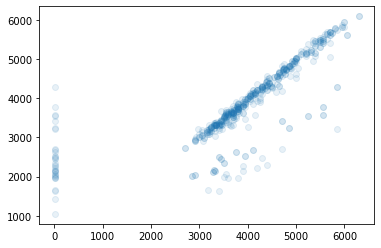

In [23]:
# 예측 결과 시각화
plt.scatter(y_train, y_train_pred, alpha=0.1)

In [24]:
# 정확도 확인

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"# R2_train = {r2_train}")

# R2_train = 0.6208082683750278


In [25]:
# 머신러닝 예측 (2) 테스트 데이터

y_test_pred = rf.predict(X_test)

ValueError: x and y must be the same size

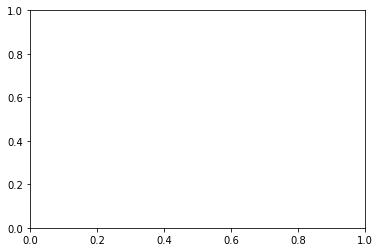

In [26]:
# 예측 결과 시각화 : 데이터 수 불일치
plt.scatter(y_test, y_test_pred, alpha=0.1)

In [27]:
print(y_test.shape, y_test_pred.shape)

(221,) (220,)


In [28]:
set(y_test.index) - set(X_test.index)

{520}

In [29]:
y_test = y_test.drop(index=520)

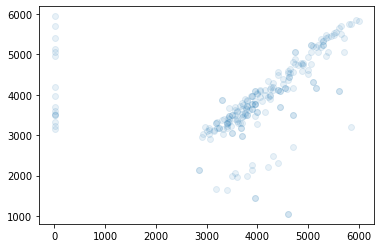

In [30]:
plt.scatter(y_test, y_test_pred, alpha=0.1)

In [31]:
# 정확도 확인

r2_test = r2_score(y_test, y_test_pred)
print(f"# R2_test = {r2_test}")

# R2_test = -0.06094435937362319


In [32]:
# 인자 중요도

fi = rf.feature_importances_
fi

array([0.18535005, 0.17170982, 0.40865315, 0.00397773, 0.00514866,
       0.13237337, 0.0163959 , 0.01091455, 0.00377726, 0.02534955,
       0.03634994])

<BarContainer object of 11 artists>

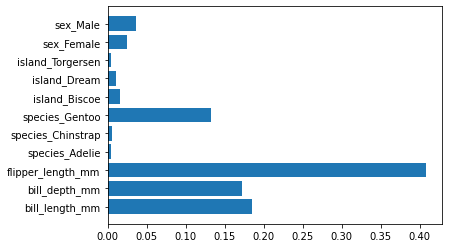

In [33]:
plt.barh(X_train.columns, fi)

In [34]:
# noise 섞기

X_train["noise"] = np.random.random(size=X_train.shape[0])
X_test["noise"] = np.random.random(size=X_test.shape[0])
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,noise
527,53.5,19.9,205.0,0,1,0,0,1,0,0,1,0.823791
86,35.9,19.2,189.0,1,0,0,1,0,0,1,0,0.305151
11,39.6,17.2,196.0,1,0,0,0,0,1,1,0,0.307543
580,37.2,19.4,184.0,1,0,0,0,0,1,0,1,0.201323
416,50.1,15.0,225.0,0,0,1,1,0,0,0,1,0.265165


In [35]:
# 다시 머신러닝, 정확도, 인자 중요도 확인

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
r2_test_noise = r2_score(y_test, y_test_pred)
print(f"R2_test_noise = {r2_test_noise}")

R2_test_noise = -0.06094435937362319


<BarContainer object of 12 artists>

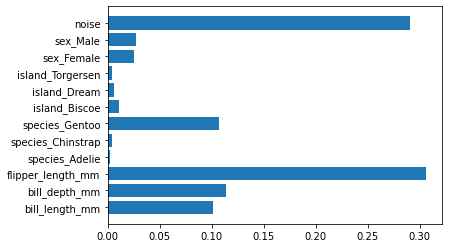

In [36]:
fi_noise = rf.feature_importances_
plt.barh(X_train.columns, fi_noise)

# Part II : Data Preprocessing

## Overview

In [37]:
# 데이터 훑어보기 1. 전체 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            736 non-null    object 
 1   island             736 non-null    object 
 2   bill_length_mm     732 non-null    float64
 3   bill_depth_mm      732 non-null    float64
 4   flipper_length_mm  732 non-null    float64
 5   body_mass_g        732 non-null    float64
 6   sex                714 non-null    object 
 7   id                 736 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 46.1+ KB


In [38]:
# 데이터 훑어보기 2. 데이터 값들

df.describe() # include="all"
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
count,736,736,732.000000,732.000000,732.000000,732.000000,714,736.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male,NaN
freq,329,359,NaN,NaN,NaN,NaN,360,NaN
mean,NaN,NaN,43.850956,17.166120,200.840164,3926.500342,NaN,1485.622283
std,NaN,NaN,5.466757,1.958167,14.065525,1296.590258,NaN,281.845046
min,NaN,NaN,32.100000,13.100000,172.000000,2.850000,NaN,1004.000000
25%,NaN,NaN,39.175000,15.600000,190.000000,3450.000000,NaN,1252.000000
50%,NaN,NaN,44.100000,17.300000,197.000000,3950.000000,NaN,1481.500000
75%,NaN,NaN,48.500000,18.700000,213.000000,4725.000000,NaN,1714.500000


## Cleansing

In [39]:
# 결측치 확인 1. 수
df.isnull().sum()

species               0
island                0
bill_length_mm        4
bill_depth_mm         4
flipper_length_mm     4
body_mass_g           4
sex                  22
id                    0
dtype: int64

In [40]:
# 결측치 확인 2. 행

df.loc[df["body_mass_g"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
168,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1075
512,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1011
520,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1075
719,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1011


In [41]:
df.loc[df["sex"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
168,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1075
192,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,1090
226,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,1794
267,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,1522
273,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1989
276,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,1598
297,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,1598
341,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,1090
369,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,1059
376,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,1489


In [42]:
# 결측치 처리 1. 신체 데이터 결측 - 삭제
df.dropna(subset=["sex"], axis=0, inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,36.2,16.1,187.0,3550.0,Female,1620
1,Adelie,Dream,43.2,18.5,192.0,4100.0,Male,1969
2,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,1565
3,Adelie,Dream,42.2,18.5,180.0,3550.0,Female,1338
4,Adelie,Dream,39.2,18.6,190.0,4250.0,Male,1292
...,...,...,...,...,...,...,...,...
731,Adelie,Dream,43.2,18.5,192.0,4100.0,Male,1969
732,Adelie,Dream,37.5,18.5,199.0,4475.0,Male,1331
733,Adelie,Dream,39.6,18.8,190.0,4600.0,Male,1151
734,Chinstrap,Dream,51.3,18.2,197.0,3750.0,Male,1008


In [43]:
# 중복값 확인
df.duplicated(["id"]).sum()

381

In [44]:
df.loc[df.duplicated(["id"])].sort_values("id")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
706,Gentoo,Biscoe,59.6,17.0,230.0,6050.000,Male,1004
734,Chinstrap,Dream,51.3,18.2,197.0,3750.000,Male,1008
362,Adelie,Dream,36.4,17.0,195.0,3.325,Female,1012
393,Adelie,Dream,36.4,17.0,195.0,3325.000,Female,1012
672,Gentoo,Biscoe,42.7,13.7,208.0,3950.000,Female,1019
...,...,...,...,...,...,...,...,...
352,Adelie,Biscoe,37.8,18.3,174.0,3400.000,Female,1979
682,Adelie,Biscoe,37.8,20.0,190.0,4250.000,Male,1981
456,Gentoo,Biscoe,42.6,13.7,213.0,4950.000,Female,1982
410,Adelie,Torgersen,39.6,17.2,196.0,3550.000,Female,1988


In [45]:
df.query("id == 1004")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
323,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,1004
706,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male,1004


In [46]:
# 중복값 처리
df.drop_duplicates(["id"], inplace=True)
df.shape

(333, 8)

<AxesSubplot:xlabel='species', ylabel='count'>

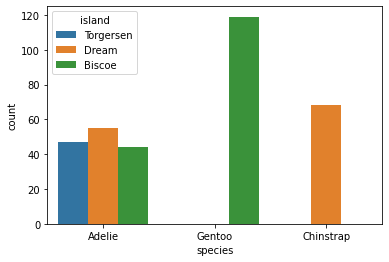

In [47]:
# 데이터 분포 확인 1. categorical features
sns.countplot(x=df["species"], hue=df["island"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

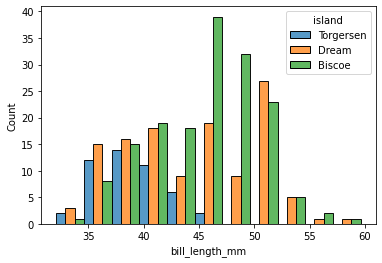

In [48]:
# 데이터 분포 확인 2. numerical features
sns.histplot(x=df["bill_length_mm"], hue=df["island"], multiple="dodge")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

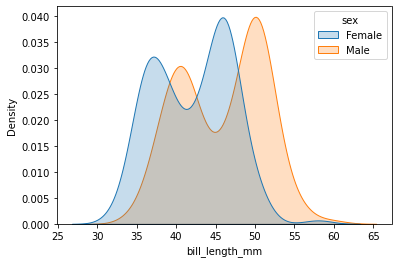

In [49]:
sns.kdeplot(x=df["bill_length_mm"], hue=df["sex"], fill=True)

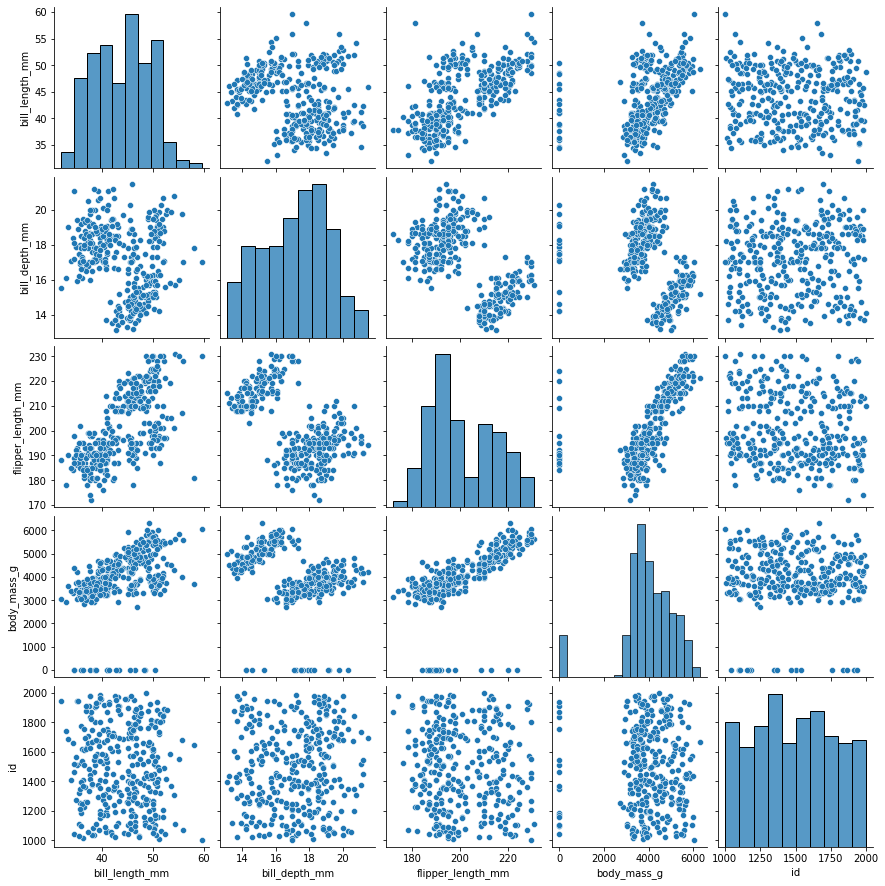

In [50]:
# 데이터 이상치 확인

sns.pairplot(df)

In [51]:
df.query("body_mass_g < 2000")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
9,Chinstrap,Dream,46.5,17.9,192.0,3.500,Female,1348
20,Adelie,Torgersen,37.7,19.8,198.0,3.500,Male,1835
26,Gentoo,Biscoe,43.5,14.2,220.0,4.700,Female,1911
56,Adelie,Torgersen,38.8,17.6,191.0,3.275,Female,1507
66,Adelie,Torgersen,34.6,17.2,189.0,3.200,Female,1466
75,Gentoo,Biscoe,50.4,15.3,224.0,5.550,Male,1102
86,Adelie,Biscoe,35.9,19.2,189.0,3.800,Female,1186
91,Gentoo,Biscoe,42.8,14.2,209.0,4.700,Female,1099
135,Chinstrap,Dream,48.5,17.5,191.0,3.400,Male,1104
136,Adelie,Biscoe,41.1,19.1,188.0,4.100,Male,1168


In [52]:
df.query("(bill_length_mm > 34) & (bill_length_mm < 36)")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
6,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male,1510
21,Adelie,Dream,35.6,17.5,191.0,3175.0,Female,1322
42,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female,1663
54,Adelie,Dream,35.7,18.0,202.0,3550.0,Female,1252
58,Adelie,Torgersen,35.2,15.9,186.0,3050.0,Female,1947
66,Adelie,Torgersen,34.6,17.2,189.0,3.2,Female,1466
69,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female,1274
86,Adelie,Biscoe,35.9,19.2,189.0,3.8,Female,1186
106,Adelie,Torgersen,35.5,17.5,190.0,3700.0,Female,1112
116,Adelie,Biscoe,35.0,17.9,190.0,3450.0,Female,1568


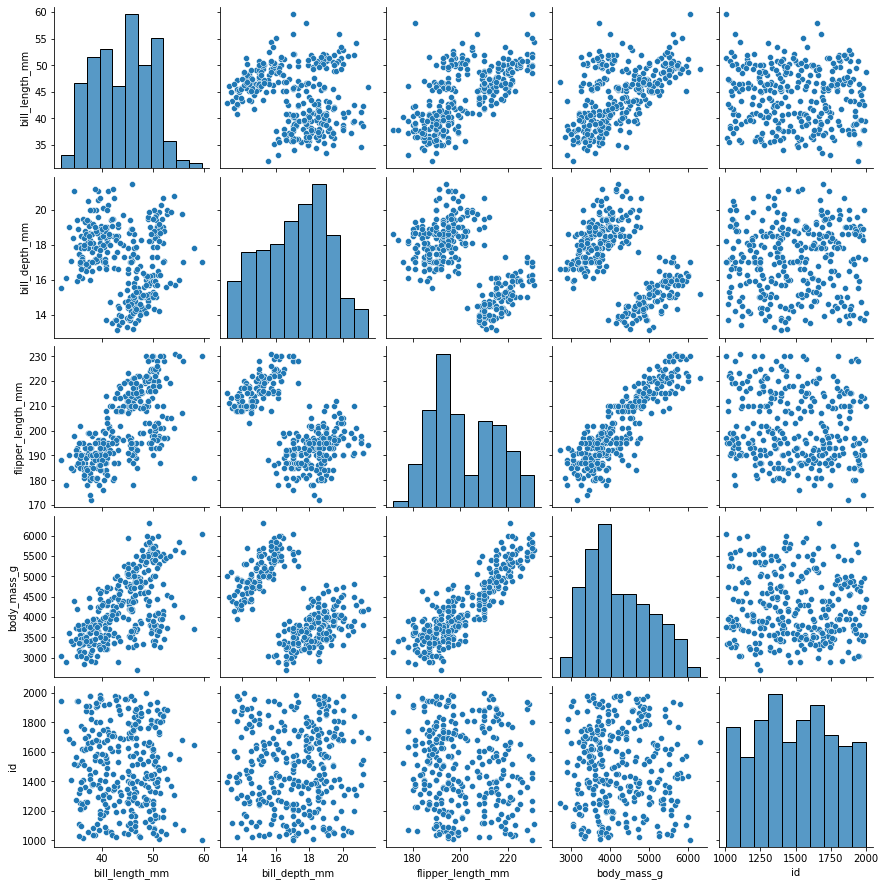

In [53]:
sns.pairplot(df.query("body_mass_g > 2000"))

In [54]:
df = df.drop(index=df.query("body_mass_g < 2000").index)

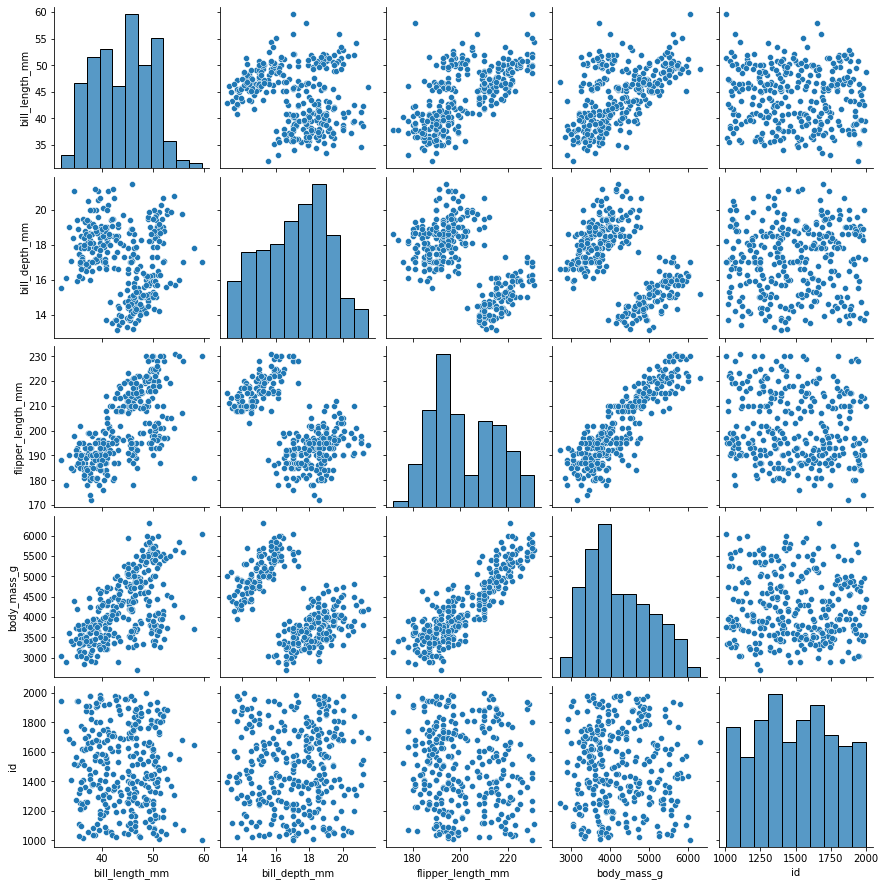

In [55]:
sns.pairplot(df)

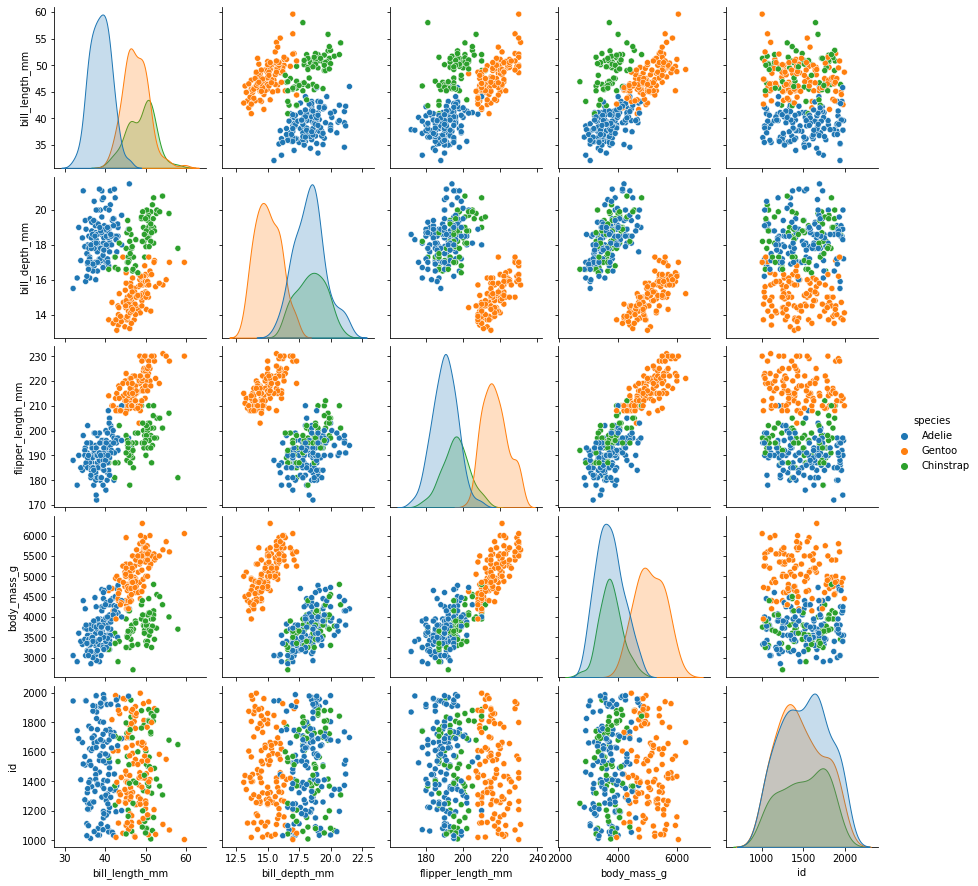

In [56]:
sns.pairplot(df, hue="species")

## Data Preparation

In [57]:
df.shape

(316, 8)

In [58]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex", "species", "island"]]
y = df["body_mass_g"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'testset')

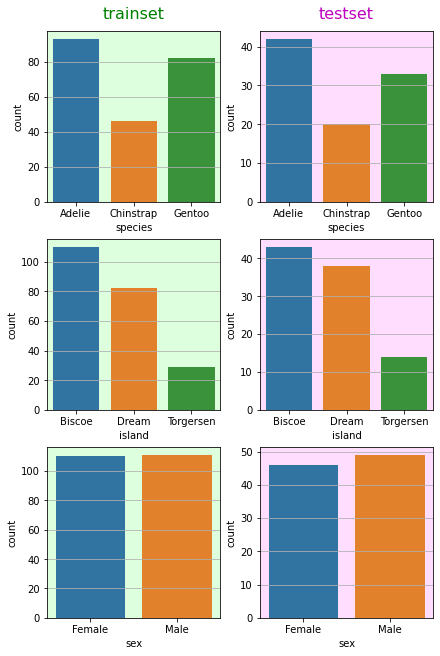

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")

axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

In [61]:
# stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X[["species", "island", "sex"]])

Text(0.5, 1.0, 'testset')

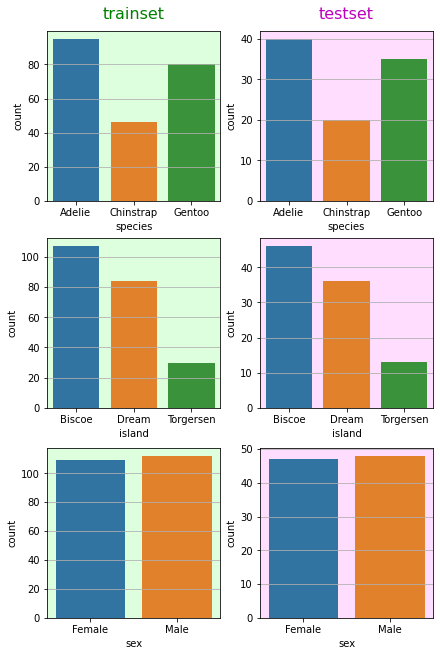

In [62]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")
    
axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

## Machine Learning (1) get_dummies

In [63]:
X_train_1 = pd.get_dummies(X_train)
X_train_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
55,52.0,19.0,197.0,0,1,0,1,0,0,1,0
366,48.7,15.1,222.0,0,1,0,0,1,1,0,0
69,35.0,17.9,192.0,1,0,1,0,0,1,0,0
33,37.6,19.3,181.0,1,0,1,0,0,0,1,0
112,49.8,15.9,229.0,0,1,0,0,1,1,0,0


In [64]:
rf = RandomForestRegressor()
rf.fit(X_train_1, y_train)

RandomForestRegressor()

In [65]:
y_train_pred = rf.predict(X_train_1)

X_test_1 = pd.get_dummies(X_test)
y_test_pred = rf.predict(X_test_1)

In [66]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.980770528111677
# R2_test = 0.8432083158625221


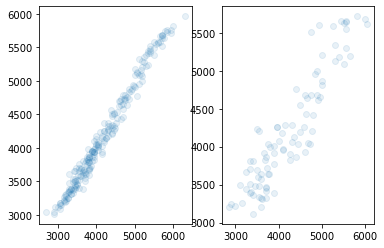

In [67]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

<BarContainer object of 11 artists>

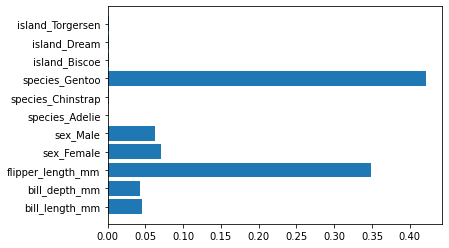

In [68]:
fi = rf.feature_importances_
plt.barh(X_train_1.columns, fi)

In [69]:
X_train_1["noise"] = np.random.random(size=X_train_1.shape[0])
X_test_1["noise"] = np.random.random(size=X_test_1.shape[0])

In [71]:
rf = RandomForestRegressor()
rf.fit(X_train_1, y_train)

y_train_pred = rf.predict(X_train_1)
y_test_pred = rf.predict(X_test_1)

print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9818025223854548
# R2_test = 0.8406094336732693


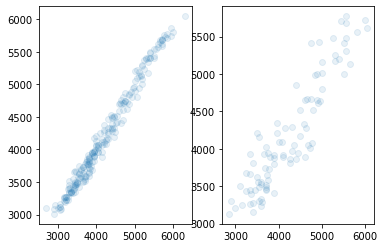

In [72]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

<BarContainer object of 12 artists>

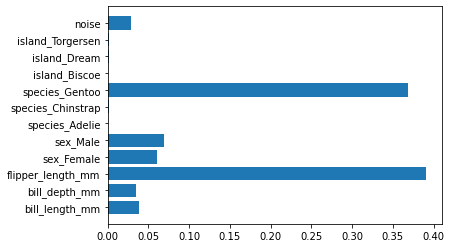

In [73]:
fi = rf.feature_importances_
plt.barh(X_train_1.columns, fi)

## Machine Learning (2) pipeline

In [74]:
# encoder
from sklearn.preprocessing import OneHotEncoder

# machine learning models
from sklearn.ensemble import RandomForestRegressor

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# data split
from sklearn.model_selection import train_test_split

In [75]:
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder(sparse=False)

num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = 'passthrough'

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features), 
                                               ("cat", cat_transformer, cat_features)])

model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("rf", RandomForestRegressor())])

In [76]:
from sklearn import set_config

set_config(display='diagram') 
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  OneHotEncoder(sparse=False),
                                                  ['species', 'island',
                                                   'sex'])])),
                ('rf', RandomForestRegressor())])

In [77]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [78]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9811531645459588
# R2_test = 0.8432835638372923


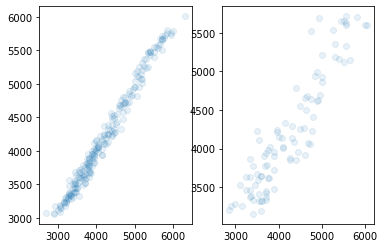

In [79]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

In [80]:
# permutation importance

from sklearn.inspection import permutation_importance

pi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=2021)

<BarContainer object of 6 artists>

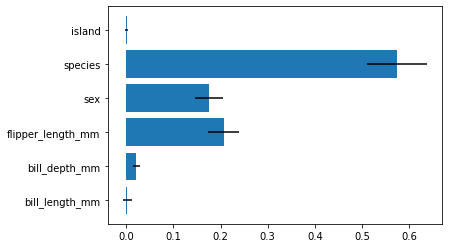

In [81]:
plt.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)